# Exploration

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Load data
startup_list = pd.read_csv('../../data/raw/startup_list_seminar.csv')

data = pd.read_json('../../data/preprocessed/translated_results_en 2.json')

In [13]:
startup_list.head()

,name,state,linkedin_industry,website_url
0,itravel,Nordrhein-Westfalen,Tourism,https://www.itravel.de/
1,ZOONO GERMANY,Nordrhein-Westfalen,Life Science & Healthcare,https://www.zoonodeutschland.com/
2,kunveno,NaN,IT and Communications,https://kunveno.de
3,t2k: Text to Knowledge,Sachsen,IT and Communications,https://text2knowledge.de
4,Scopas,Berlin,IT and Communications,https://www.scopas.io/


In [14]:
data.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [15]:
# Set index
data = data.set_index('original_idx')
data

,name,website_url,website_text,original_language,website_text_in_en
original_idx,,,,,
0,itravel,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
2,kunveno,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
4,Scopas,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
5,studymaniac,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
9,Aicone,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...
...,...,...,...,...,...
4994,Coleap,https://coleap.com/,Coleap Transform your content into incomeTurn ...,en,Coleap Transform your content into incomeTurn ...
4995,Trade Machines FI,http://trademachines.com,▷ All used industrial equipment online on Trad...,en,▷ All used industrial equipment online on Trad...
4996,Yasoon,http://yasoon.com/,Home - yasoon Patrick Partner Manager Get in t...,en,Home - yasoon Patrick Partner Manager Get in t...


In [17]:
# Merge the two data sets
data = pd.merge(startup_list, data)

In [18]:
data.head()

,name,state,linkedin_industry,website_url,website_text,original_language,website_text_in_en
0,itravel,Nordrhein-Westfalen,Tourism,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,NaN,IT and Communications,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
2,Scopas,Berlin,IT and Communications,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
3,studymaniac,Nordrhein-Westfalen,Education,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
4,Aicone,Hamburg,Energy & Electricity,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [20]:
# Drop columns
data = data[['website_text_in_en', 'linkedin_industry']]

In [22]:
import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing_en import preprocess_data

In [23]:
preprocess_data(data['website_text_in_en'])
data.head()

,website_text_in_en,linkedin_industry
0,itravel Telephone advice +49 221 8282 8880 | S...,Tourism
1,Kunveno - Work Happier WORK HAPPIER Boost cult...,IT and Communications
2,ScopasWe're working on something new.Check it ...,IT and Communications
3,Studymaniac - study successfully Open main men...,Education
4,Aicone - Artificial Intelligence Cloud One | A...,Energy & Electricity


In [24]:
# Check for na values
data.isna().sum()

website_text_in_en      0
linkedin_industry     128
dtype: int64

In [26]:
# Drop na values
data = data.dropna()

In [28]:
# Check unique linkedin industries
unique_industries = data['linkedin_industry'].unique()
print(f"Unique industries: {unique_industries}\n")

unique_industries_count = data['linkedin_industry'].nunique()
print(f"Number of unique industries: {unique_industries_count}")

Unique industries: ['Tourism' 'IT and Communications' 'Education' 'Energy & Electricity'
 'Other' 'Industrial & Basic Materials' 'Life Science & Healthcare'
 'Consulting' 'Chemicals/Pharmaceuticals' 'Finance & Insurance'
 'Nutrition & Consumables' 'Construction/Real Estate'
 'Media, Arts & Entertainment' 'Water, Waste Treatment & Recycling'
 'Automotive, Logistics & Mobility' 'Human Resources'
 'Agriculture & Forestry' 'Sports & Amusement/Gaming incl. Online'
 'Security' 'Textiles']

Number of unique industries: 20


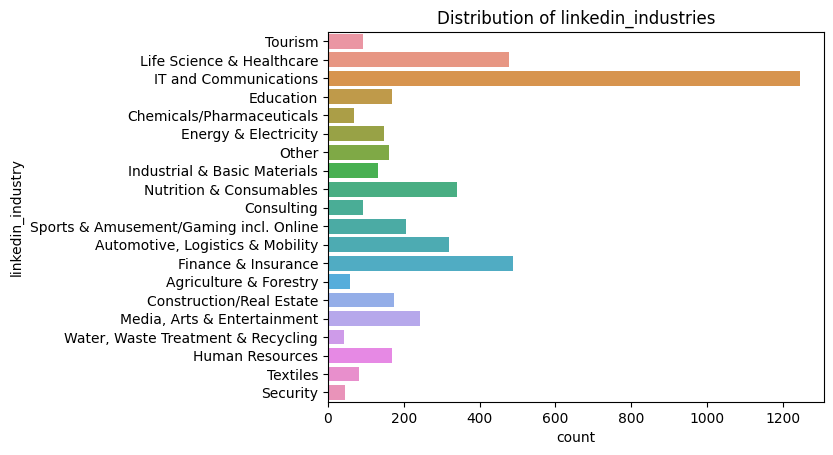

In [29]:
# Visualize distribution of linkedin_industries
sns.countplot(data=startup_list, y='linkedin_industry')
plt.title("Distribution of linkedin_industries")
plt.show()

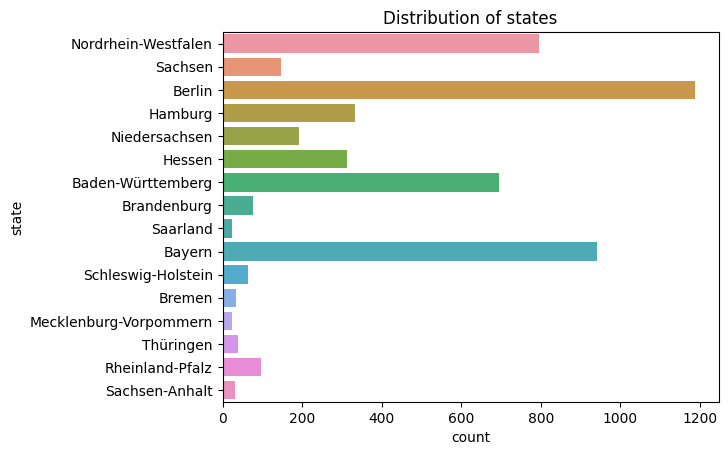

In [30]:
# Visualize distribution of states
sns.countplot(data=startup_list, y='state')
plt.title("Distribution of states")
plt.show()

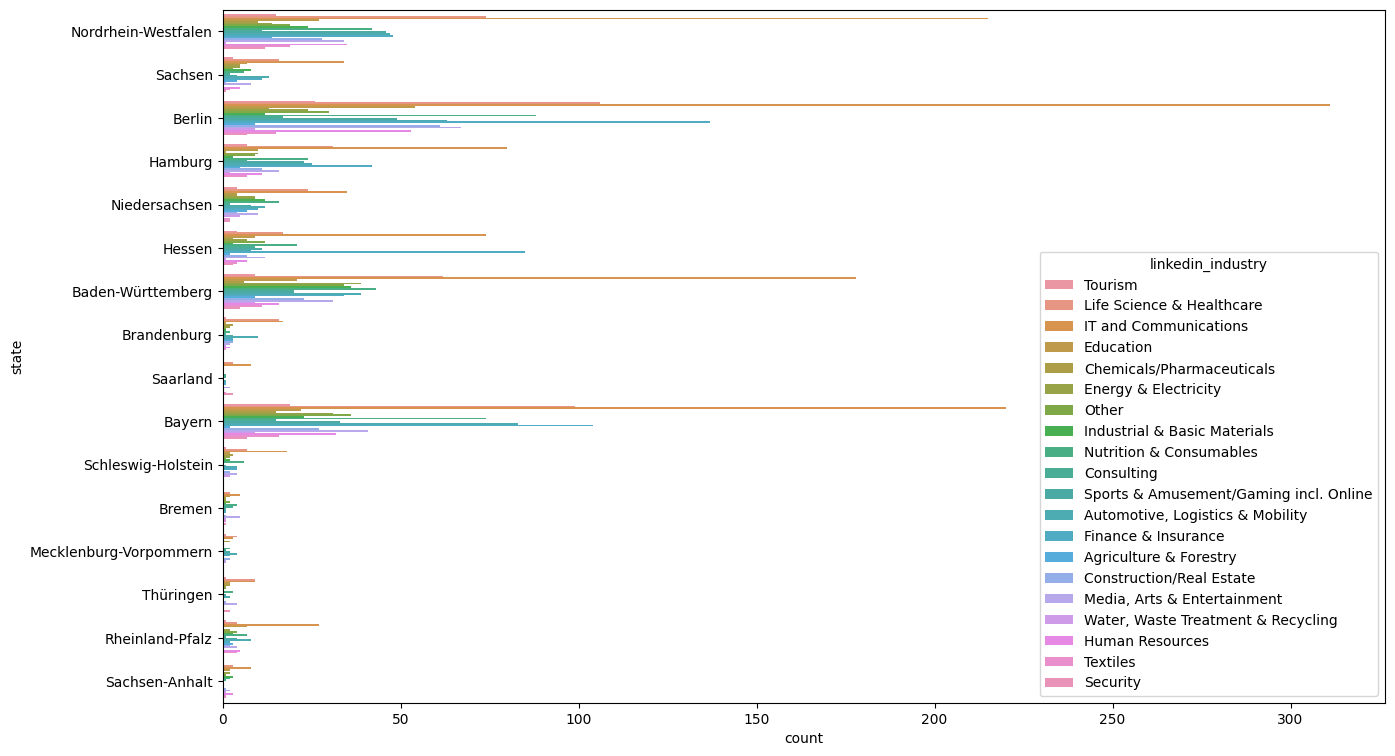

In [31]:
# Distribution of linkedin_industries w.r.t. state
plt.figure(figsize=(15, 9))
sns.countplot(data=startup_list, y='state', hue='linkedin_industry')
plt.show()

## Calculate Silhouette Score for GICS Clustering

In [32]:
# Convert columns in categorical data type
data['linkedin_industry'] = data['linkedin_industry'].astype('category')

In [33]:
# Create mapping for 'linkedin_industry'
industry_mapping = {category: index for index, category in enumerate(data['linkedin_industry'].unique())}

# Map 'industry' and 'name' categories to integers
data['linkedin_industry'] = data['linkedin_industry'].map(industry_mapping)

In [36]:
# Initialize TF-IDF Vectorizer from sklearn
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2',
                             max_features=1000, max_df=0.5, min_df=2, stop_words='english')

# Apply vectorizer
tf_idf_matrix = vectorizer.fit_transform(data['website_text_in_en'])

In [38]:
# Extract GICS labels
gics_labels = data['linkedin_industry']

# Calculate silhouette coefficient
sil_score_gics = silhouette_score(tf_idf_matrix, gics_labels)

print(f"Silhoutte Score of GICS Clustering is {sil_score_gics}")

Silhoutte Score of GICS Clustering is -0.001973310644330174
